<a href="https://colab.research.google.com/github/khiljaekang/pytorch/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_MNIST_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치 MNIST 모델

## modules import 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


## 전처리 설정
- `transform.Compose`

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

## 데이터 로드 및 데이터 확인

In [5]:
trainset = torchvision.datasets.MNIST(root='./data/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='./data/',
                                      train=False,
                                      download=True,
                                      transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_loader = DataLoader(trainset,
                          batch_size= 128,
                          shuffle= True,
                          num_workers=2)

test_loader = DataLoader(trainset,
                          batch_size= 128,
                          shuffle= False,
                          num_workers=2)

In [7]:
image, label = next(iter(train_loader))

In [8]:
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [9]:
def imshow(img):
  img = img /2 + 0.5
  npimg = img.numpy()
  fig = plt.figure(figsize=(10,5))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

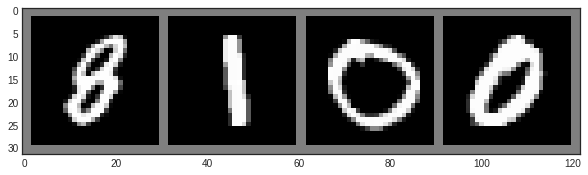

In [10]:
dataiter = iter(train_loader)
images, lables = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

## 신경망 구성

In [12]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      # 첫번째 2D 컨볼루션 계층
      # 1개의 입력 채널(이미지)을 받아들이고, 사각 커널 사이즈가 3인 32개의 컨볼루션 특징들을 출력합니다.
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      # 두번째 2D 컨볼루션 계층
      # 32개의 입력 게층을 받아들이고, 사각 커널 사이즈가 3인 64개의 컨볼루션 특징을 출력합니다.
      self.conv2 = nn.Conv2d(32, 64, 3, 1)

      # 인접한 픽셀들은 입력 확률에 따라 모두 0 값을 가지거나 혹은 모두 유효한 값이 되도록 만듭니다.
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)

      # 첫번째 fully connected layer
      self.fc1 = nn.Linear(9216, 128)
      # 10개의 라벨을 출력하는 두번째 fully connected layer
      self.fc2 = nn.Linear(128, 10)

        # x는 데이터를 나타냅니다.
    def forward(self, x):
      # 데이터가 conv1을 지나갑니다.
      x = self.conv1(x)
      # x를 ReLU 활성함수(rectified-linear activation function)에 대입합니다.
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)

      # x에 대해서 max pooling을 실행합니다.
      x = F.max_pool2d(x, 2)
      # 데이터가 dropout1을 지나갑니다.
      x = self.dropout1(x)
      # start_dim=1으로 x를 압축합니다.
      x = torch.flatten(x, 1)
      # 데이터가 fc1을 지나갑니다.
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # x에 softmax를 적용합니다.
      output = F.log_softmax(x, dim=1)
      return output
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


임의의 값을 넣어 forward값 확인

In [13]:
# 임의의 28x28 이미지로 맞춰줍니다.
input = torch.rand((1, 1, 28, 28))

net = Net()
result = net(input)
print (result)

tensor([[-2.2100, -2.2201, -2.3187, -2.3909, -2.4314, -2.2516, -2.2595, -2.3228,
         -2.2641, -2.3829]], grad_fn=<LogSoftmaxBackward>)


- `.parameters()` 

## 손실함수와 옵티마이저

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 모델 학습

- `optimizer.zero_grad` : 가중치의 그래디언트 초기화

- loss 계산

- `loss.backward()`

- `optmizer.step()` : 업데이트

- 배치수 확인

In [15]:
total_batch = len(train_loader)
print(total_batch)

469


- 설명을 위해 `epochs=2`로 지정

In [16]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    input, labels = data

    optimizer.zero_grad()

    outputs = net(input)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print("Epoch: {} , Iter: {}, Loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch: 1 , Iter: 100, Loss: 0.10829516607522964
Epoch: 1 , Iter: 200, Loss: 0.0673748714029789
Epoch: 1 , Iter: 300, Loss: 0.03683115485310554
Epoch: 1 , Iter: 400, Loss: 0.02930165047943592
Epoch: 2 , Iter: 100, Loss: 0.0247985470443964
Epoch: 2 , Iter: 200, Loss: 0.0222007407695055
Epoch: 2 , Iter: 300, Loss: 0.021058840736746787
Epoch: 2 , Iter: 400, Loss: 0.019785979568958282


## 모델의 저장 및 로드

- `torch.save`
  - `net.state_dict()`를 저장

- `torch.load`
  - `load_state_dict`로 모델을 로드

In [18]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [21]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

## 모델 테스트

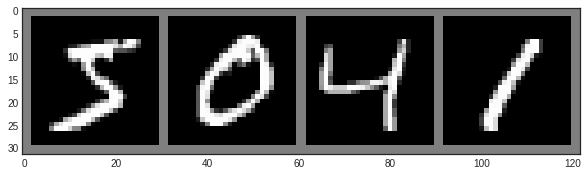

In [32]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:4]))

In [33]:
outputs = net(images)

In [34]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        2, 3, 4, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        5, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 2, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 0, 0, 2, 6, 7, 3, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 6, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        7, 0, 2, 7, 1, 8, 6, 4])


In [37]:
print(''.join('{}'.format(str(predicted[j].numpy())) for j in range(4)))

5041


In [43]:
correct = 0
total = 0 

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct /total)


88.91666666666667


## GPU 설정 후 학습
- 설정 후, 모델과 데이터에 `to`로 GPU를 사용 가능한 형태로 변환 해줘야 한다.

- `.cuda()` 로도 가능

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

- 현재 GPU 설정

In [2]:
torch.cuda.is_available()

True

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [7]:
device

device(type='cuda')

- 데이터 로드


In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.MNIST(root='./data/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='./data/',
                                      train=False,
                                      download=True,
                                      transform=transform)
train_loader = DataLoader(trainset,
                          batch_size= 128,
                          shuffle= True,
                          num_workers=2)

test_loader = DataLoader(trainset,
                          batch_size= 128,
                          shuffle= False,
                          num_workers=2)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


- 모델 생성

In [9]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      # 첫번째 2D 컨볼루션 계층
      # 1개의 입력 채널(이미지)을 받아들이고, 사각 커널 사이즈가 3인 32개의 컨볼루션 특징들을 출력합니다.
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      # 두번째 2D 컨볼루션 계층
      # 32개의 입력 게층을 받아들이고, 사각 커널 사이즈가 3인 64개의 컨볼루션 특징을 출력합니다.
      self.conv2 = nn.Conv2d(32, 64, 3, 1)

      # 인접한 픽셀들은 입력 확률에 따라 모두 0 값을 가지거나 혹은 모두 유효한 값이 되도록 만듭니다.
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)

      # 첫번째 fully connected layer
      self.fc1 = nn.Linear(9216, 128)
      # 10개의 라벨을 출력하는 두번째 fully connected layer
      self.fc2 = nn.Linear(128, 10)

        # x는 데이터를 나타냅니다.
    def forward(self, x):
      # 데이터가 conv1을 지나갑니다.
      x = self.conv1(x)
      # x를 ReLU 활성함수(rectified-linear activation function)에 대입합니다.
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)

      # x에 대해서 max pooling을 실행합니다.
      x = F.max_pool2d(x, 2)
      # 데이터가 dropout1을 지나갑니다.
      x = self.dropout1(x)
      # start_dim=1으로 x를 압축합니다.
      x = torch.flatten(x, 1)
      # 데이터가 fc1을 지나갑니다.
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # x에 softmax를 적용합니다.
      output = F.log_softmax(x, dim=1)
      return output
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
net = Net().to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    input, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    outputs = net(input)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print("Epoch: {} , Iter: {}, Loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch: 1 , Iter: 100, Loss: 0.10921377891302109
Epoch: 1 , Iter: 200, Loss: 0.06920410400629043
Epoch: 1 , Iter: 300, Loss: 0.03687202920019626
Epoch: 1 , Iter: 400, Loss: 0.027616960614919663
Epoch: 2 , Iter: 100, Loss: 0.022311723679304122
Epoch: 2 , Iter: 200, Loss: 0.02041746939718723
Epoch: 2 , Iter: 300, Loss: 0.019279742285609244
Epoch: 2 , Iter: 400, Loss: 0.018098703488707544


In [14]:
correct = 0
total = 0 

with torch.no_grad():
  for data in test_loader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct /total)


89.775
